In [29]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from pathlib import Path
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
stocks = ["aapl", "amd", "amzn", "msft", "nvda"]

data_set = pd.read_csv("out.csv")
dataFrames = []

for stock in stocks :
  df = data_set[["timestamp", "open_"+stock, "high_"+stock, "low_"+stock, "close_"+stock,
         "volume_"+stock, "trade_count_"+stock, "open_eur", "close_eur", ]]
  dataFrames.append(df)



In [31]:
window_size = 10
data = dataFrames[0]

X = []
y = data[:len(data) - window_size];
# Create input-output pairs
for i in range(len(data) - window_size):
    X.append(data[i:i+window_size])

X = np.array(X)


X_train, y_train = X[:int(len(data)*0.7), :window_size], X[:int(len(data)*0.7), 4]
X_valid, y_valid = X[int(len(data)*0.7):int(len(data)*0.9), :window_size], X[int(len(data)*0.7):int(len(data)*0.9), 4]
X_test, y_test = X[int(len(data)*0.9):, :window_size], X[int(len(data)*0.9):, 4]


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (837, 10, 9)
y_train shape: (837, 9)
X_valid shape: (239, 10, 9)
y_valid shape: (239, 9)
X_test shape: (110, 10, 9)
y_test shape: (110, 9)


In [32]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(window_size, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(window_size, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, window_size + 1, 0.075, 0.2])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

In [33]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

In [34]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(30, return_sequences=True, input_shape=[None, 9]),
    keras.layers.Dropout(0.1),
    keras.layers.SimpleRNN(30, return_sequences=True),
    keras.layers.Dropout(0.1),
    keras.layers.SimpleRNN(30, return_sequences=True),
    keras.layers.Dropout(0.1),
    keras.layers.SimpleRNN(9)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
27/27 [==============================] - 4s 32ms/step - loss: 0.2778 - val_loss: 0.0673
Epoch 2/50
27/27 [==============================] - 0s 12ms/step - loss: 0.1740 - val_loss: 0.0418
Epoch 3/50
27/27 [==============================] - 0s 13ms/step - loss: 0.1296 - val_loss: 0.0240
Epoch 4/50
27/27 [==============================] - 0s 12ms/step - loss: 0.1052 - val_loss: 0.0257
Epoch 5/50
27/27 [==============================] - 0s 12ms/step - loss: 0.0889 - val_loss: 0.0164
Epoch 6/50
27/27 [==============================] - 0s 12ms/step - loss: 0.0737 - val_loss: 0.0234
Epoch 7/50
27/27 [==============================] - 0s 13ms/step - loss: 0.0587 - val_loss: 0.0156
Epoch 8/50
27/27 [==============================] - 0s 18ms/step - loss: 0.0518 - val_loss: 0.0166
Epoch 9/50
27/27 [==============================] - 1s 21ms/step - loss: 0.0459 - val_loss: 0.0132
Epoch 10/50
27/27 [==============================] - 1s 20ms/step - loss: 0.0404 - val_loss: 0.0173
Epoch 11/

In [35]:
model.evaluate(X_valid, y_valid)

8/8 [==============================] - 0s 4ms/step - loss: 0.0054


0.0054208338260650635

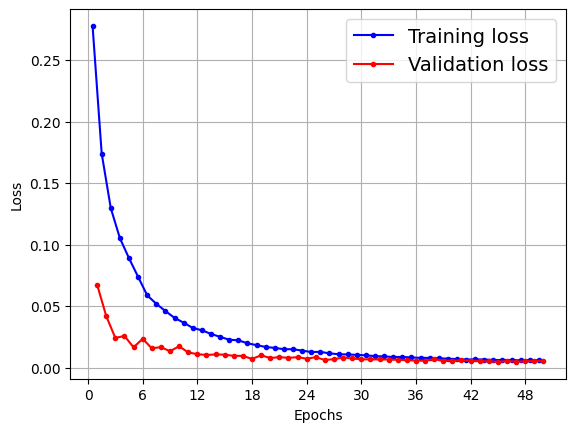

In [36]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

8/8 [==============================] - 1s 4ms/step


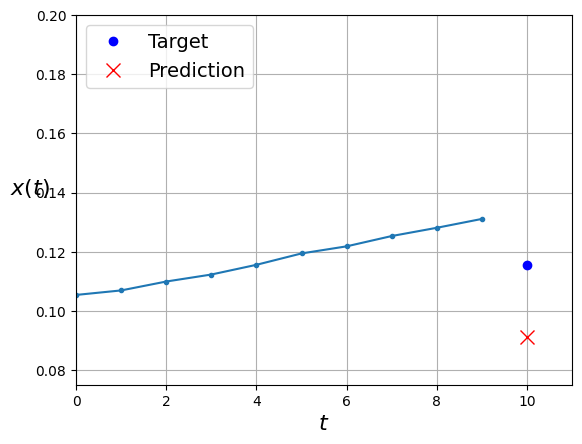

In [37]:
y_pred = model.predict(X_valid)

plot_series(X_valid[0, :, 4], y_valid[0, 4], y_pred[0, 4])
plt.show()